In [41]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

In [42]:
train=pd.read_csv(r"C:\Users\anvay\Desktop\Desktop\Data\counterfeit_train.csv")
test=pd.read_csv(r"C:\Users\anvay\Desktop\Desktop\Data\counterfeit_test.csv")

In [43]:
train.head(1)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.1,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026


In [44]:
test['Counterfeit_Sales']=np.nan
test['data']='test'
train['data']='train'
all=pd.concat([train,test],axis=0)

In [45]:
all.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [46]:
import seaborn as sns

In [47]:
all['Counterfeit_Weight']=all['Counterfeit_Weight'].replace(np.nan,all['Counterfeit_Weight'].median())

In [48]:
all['True_Mrp']=all['Medicine_MRP']/all['Counterfeit_Weight']

In [49]:
all['True_Mrp'].head(5)

0    12.231802
1     7.945209
2    28.743402
3     8.473136
4     4.060446
Name: True_Mrp, dtype: float64

In [50]:
all['Dist_ID']=all['DistArea_ID'].str.extract("(\d\d\d)",expand=True)

In [51]:
all['Dist_ID']=pd.to_numeric(all['Dist_ID'])

In [52]:
all.drop(['DistArea_ID'],axis=1,inplace=True)

In [53]:
all.head(10)

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,True_Mrp,Dist_ID
0,RRA15,13.100,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train,12.231802,46
1,YVV26,13.900,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train,7.945209,27
2,LJC15,9.025,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train,28.743402,46
3,GWC40,11.800,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train,8.473136,46
4,QMN13,13.900,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train,4.060446,19
5,JDG81,8.775,2000,165.5656,Antiseptics,mild,0.088881,DownTown,Tier 2,Unknown,3047.8464,train,18.867875,45
6,KPX48,18.000,2007,156.9102,Hreplacements,critical,0.051685,Industrial,Tier 3,Medium,2883.3938,train,8.717233,18
7,CYW14,7.680,1985,154.3470,Antiseptics,mild,0.028150,DownTown,Tier 3,High,3262.2340,train,20.097266,13
8,TVF57,18.550,1995,107.3068,Hreplacements,critical,0.060266,DownTown,Tier 1,Small,1959.9292,train,5.784733,46
9,MGU75,9.510,1985,161.1392,Statins,mild,0.023755,DownTown,Tier 3,High,3095.7840,train,16.944185,13


In [54]:
all.nunique()

Medicine_ID            1557
Counterfeit_Weight      415
Active_Since              9
Medicine_MRP           5949
Medicine_Type            16
SidEffect_Level           2
Availability_rating    7882
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
data                      2
True_Mrp               8076
Dist_ID                  10
dtype: int64

In [55]:
all.isnull().sum()

Medicine_ID               0
Counterfeit_Weight        0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
data                      0
True_Mrp                  0
Dist_ID                   0
dtype: int64

In [56]:
all['Area_City_Type']=all['Area_City_Type'].map({'Tier 1':1,"Tier 2":2,"Tier 3":3})

In [57]:
all['SidEffect_Level']=all['SidEffect_Level'].map({'critical':1,"mild":2})

C:\Users\anvay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


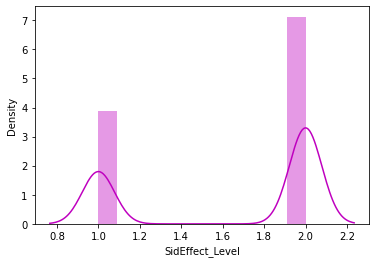

In [58]:
g = sns.distplot(all["SidEffect_Level"], color="m", label="Skewness : %.2f"%(all["SidEffect_Level"].skew()))

In [59]:
all['Area_Type']=all['Area_Type'].map({"DownTown":1,"MidTownResidential":2,"CityLimits":3,"Industrial":4})

C:\Users\anvay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


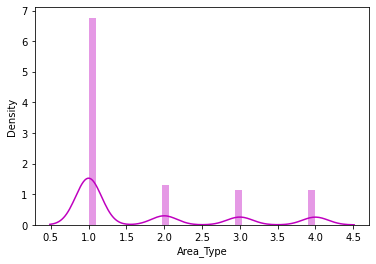

In [60]:
g = sns.distplot(all["Area_Type"], color="m", label="Skewness : %.2f"%(all["Area_Type"].skew()))

In [61]:
import seaborn as sns

In [62]:
all['Area_dist_level'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1700    False
1701    False
1702    False
1703    False
1704    False
Name: Area_dist_level, Length: 8523, dtype: bool

In [63]:
all['Area_dist_level']=all['Area_dist_level'].map({"Small":1,"Medium":2,"High":3,"Unknown":4})

In [64]:
list(zip(all['Medicine_ID'],all['Medicine_Type']))

[('RRA15', 'Antimalarial'),
 ('YVV26', 'Mstablizers'),
 ('LJC15', 'Cardiac'),
 ('GWC40', 'OralContraceptives'),
 ('QMN13', 'Hreplacements'),
 ('JDG81', 'Antiseptics'),
 ('KPX48', 'Hreplacements'),
 ('CYW14', 'Antiseptics'),
 ('TVF57', 'Hreplacements'),
 ('MGU75', 'Statins'),
 ('SAC31', 'Analgesics'),
 ('TTM88', 'Cardiac'),
 ('RUT58', 'MuscleRelaxants'),
 ('ZSC82', 'Mstablizers'),
 ('ZFZ28', 'Antibiotics'),
 ('KZP71', 'Hreplacements'),
 ('OMS12', 'Mstablizers'),
 ('RWD64', 'Antimalarial'),
 ('TIE50', 'Antiseptics'),
 ('CCH12', 'Antifungal'),
 ('KAE47', 'Antibiotics'),
 ('WXP11', 'Antiviral'),
 ('MXD18', 'Antimalarial'),
 ('HPK57', 'Tranquilizers'),
 ('DMF12', 'Antiseptics'),
 ('DVT10', 'Analgesics'),
 ('DOS34', 'Analgesics'),
 ('ZDE75', 'Antiseptics'),
 ('KSE64', 'Mstablizers'),
 ('LRF62', 'Hreplacements'),
 ('WAF13', 'Cardiac'),
 ('BMX49', 'Tranquilizers'),
 ('ZAM11', 'Antibiotics'),
 ('PEQ68', 'Antacids'),
 ('LRF62', 'Hreplacements'),
 ('OLD10', 'Antifungal'),
 ('NNX49', 'Antibiotics'

C:\Users\anvay\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\anvay\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


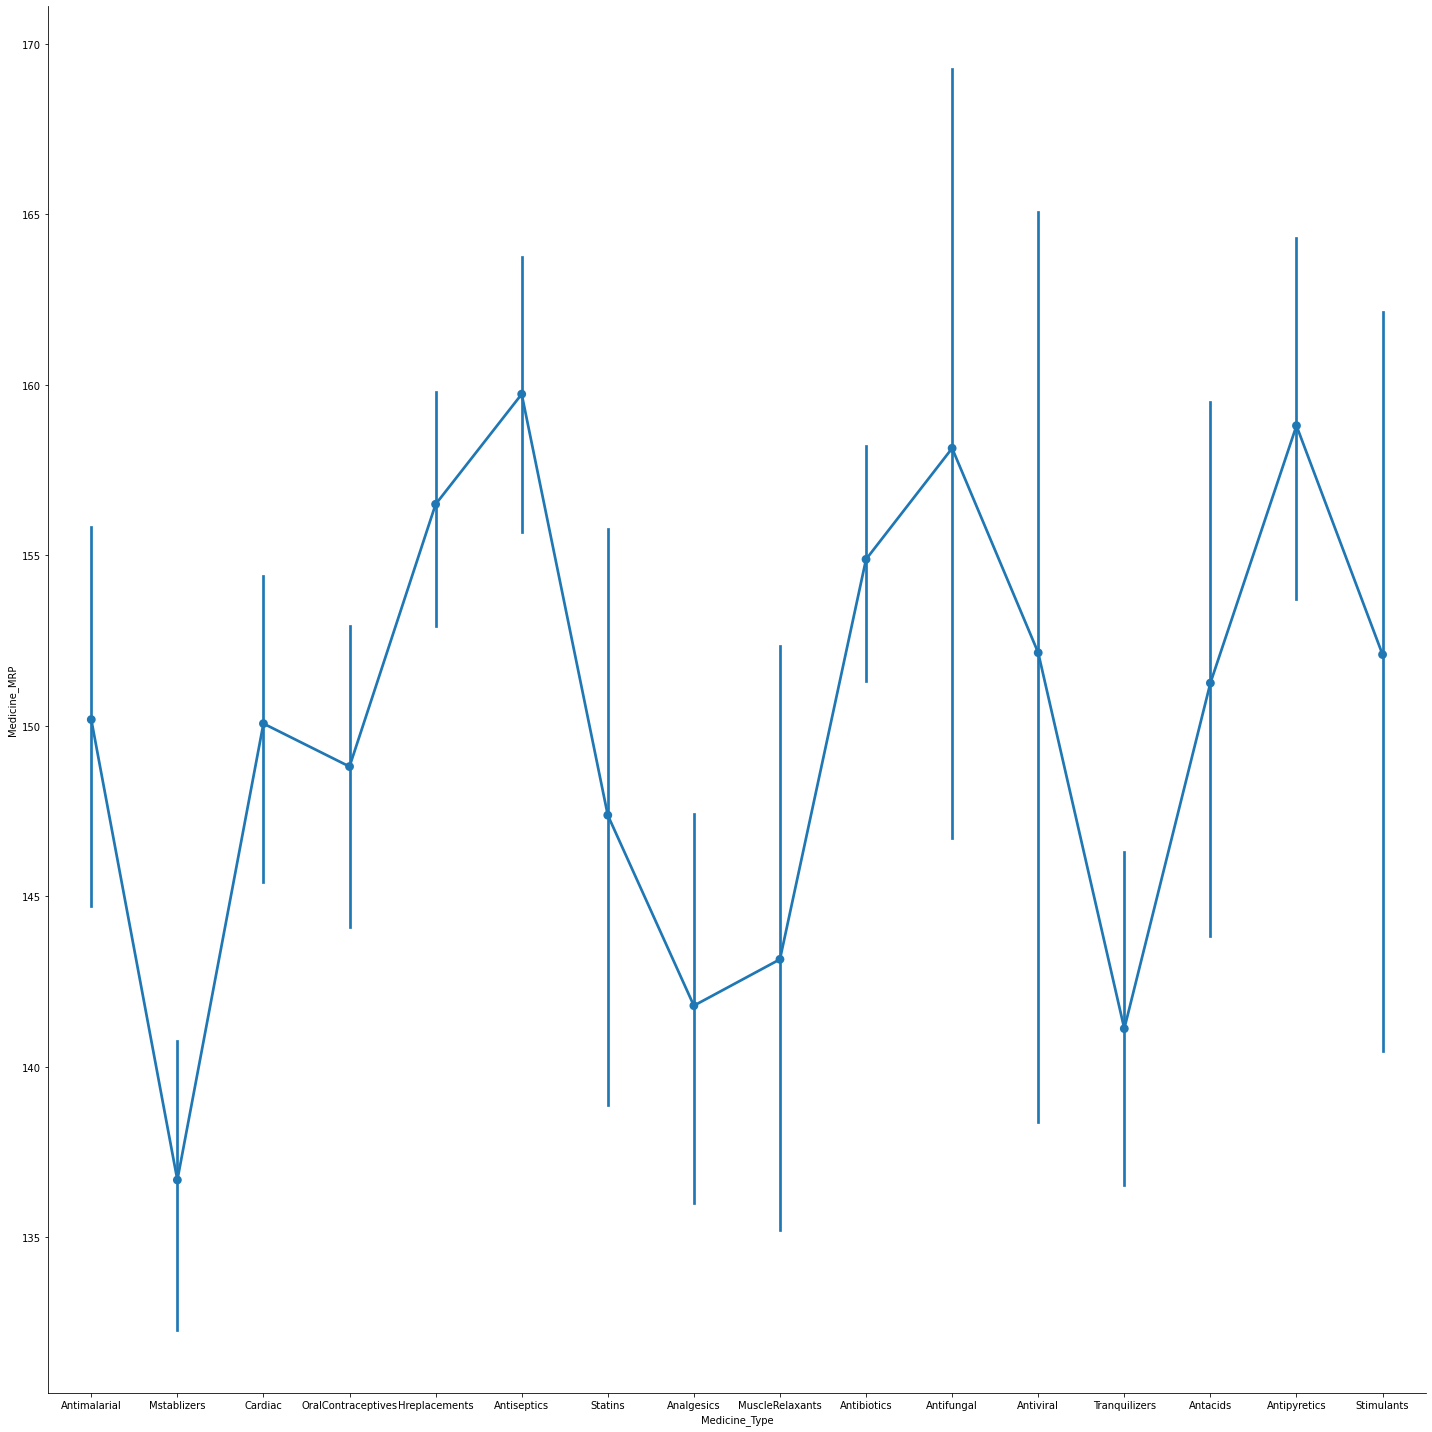

In [65]:
g=sns.factorplot(x="Medicine_Type",y="Medicine_MRP",data=all,Kind="bar",size=20)

C:\Users\anvay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


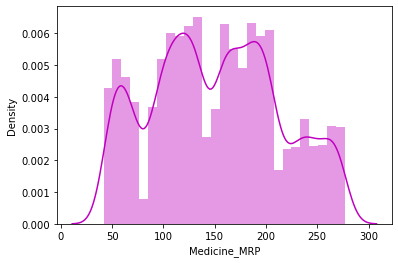

In [66]:
g = sns.distplot(all["Medicine_MRP"], color="m", label="Skewness : %.2f"%(all["Medicine_MRP"].skew()))

In [67]:
all.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,True_Mrp,Dist_ID
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,6818.000000,8523.000000,8523.000000
mean,14.11342,1995.831867,151.292782,1.647307,0.079132,1.673120,2.112871,2.394697,2280.583480,11.831837,29.108765
std,4.22724,8.371760,62.275067,0.477836,0.051598,1.045397,0.812757,1.168318,1693.354404,6.475131,13.927648
min,5.85500,1983.000000,41.590000,1.000000,0.013000,1.000000,1.000000,1.000000,146.290000,2.065092,10.000000
25%,10.61000,1985.000000,104.126500,1.000000,0.039989,1.000000,1.000000,1.000000,933.265600,6.985537,17.000000
50%,13.90000,1997.000000,153.312800,2.000000,0.066931,1.000000,2.000000,2.000000,1902.670400,10.762082,27.000000
75%,17.30000,2002.000000,195.943700,2.000000,0.107585,2.000000,3.000000,4.000000,3207.638400,14.966090,45.000000
max,22.65000,2007.000000,277.188400,2.000000,0.341391,4.000000,3.000000,4.000000,13199.964800,41.458710,49.000000


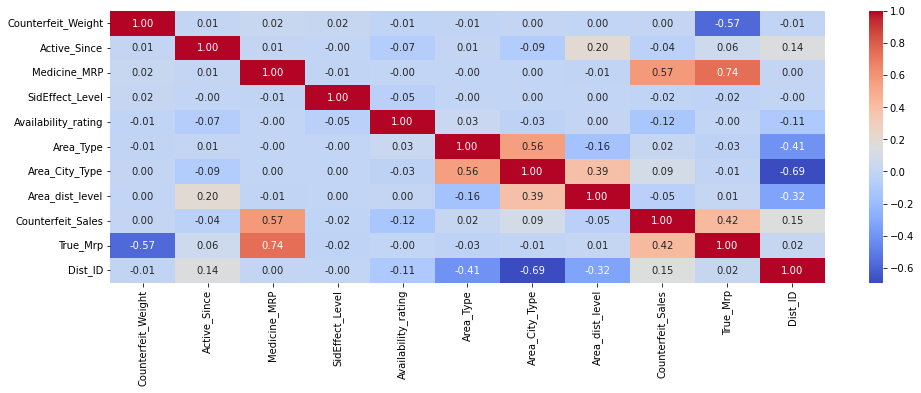

In [68]:
plt.figure(figsize = (16,5))

g=sns.heatmap(all.corr(),annot=True,fmt=".2f",cmap="coolwarm")

In [69]:
all.drop(['Counterfeit_Weight','SidEffect_Level','Area_Type'],axis=1,inplace=True)

In [70]:
#index_nan=list(all['Counterfeit_Weight'][all['Counterfeit_Weight'].isnull()].index)

In [71]:
#for i in index_nan :
 #   weight_med = all["Counterfeit_Weight"].median()
  #  weight_pred = all["Counterfeit_Weight"][((all['Medicine_MRP'] == all.iloc[i]["Medicine_MRP"]).median()
   # if not np.isnan(weight_pred):
    #    all['Counterfeit_Weight'].iloc[i] = weight_pred
    #else:
     #   all['Counterfeit_Weight'].iloc[i] = weight_med

In [72]:
#all['Counterfeit_Weight']=all['Counterfeit_Weight'].fillna(all['Counterfeit_Weight'],median(),inplace=True)

In [73]:
#del all['Medicine_ID']

In [74]:
all.select_dtypes("object").columns

Index(['Medicine_ID', 'Medicine_Type', 'data'], dtype='object')

In [75]:
for col in ['Medicine_Type','Medicine_ID']:
    temp=pd.get_dummies(all[col],prefix=col)
    all=pd.concat([all,temp],1)
    all.drop([col],axis=1,inplace=True)

C:\Users\anvay\AppData\Local\Temp/ipykernel_3312/147399393.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  all=pd.concat([all,temp],1)


In [76]:
all.columns

Index(['Active_Since', 'Medicine_MRP', 'Availability_rating', 'Area_City_Type',
       'Area_dist_level', 'Counterfeit_Sales', 'data', 'True_Mrp', 'Dist_ID',
       'Medicine_Type_Analgesics',
       ...
       'Medicine_ID_ZUZ10', 'Medicine_ID_ZVH10', 'Medicine_ID_ZVR52',
       'Medicine_ID_ZWG14', 'Medicine_ID_ZWS21', 'Medicine_ID_ZXN29',
       'Medicine_ID_ZXO53', 'Medicine_ID_ZYE13', 'Medicine_ID_ZYP12',
       'Medicine_ID_ZZU58'],
      dtype='object', length=1582)

In [77]:
all.dtypes

Active_Since             int64
Medicine_MRP           float64
Availability_rating    float64
Area_City_Type           int64
Area_dist_level          int64
                        ...   
Medicine_ID_ZXN29        uint8
Medicine_ID_ZXO53        uint8
Medicine_ID_ZYE13        uint8
Medicine_ID_ZYP12        uint8
Medicine_ID_ZZU58        uint8
Length: 1582, dtype: object

In [78]:
all.head(5)

,Active_Since,Medicine_MRP,Availability_rating,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,True_Mrp,Dist_ID,Medicine_Type_Analgesics,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antipyretics,Medicine_Type_Antiseptics,Medicine_Type_Antiviral,Medicine_Type_Cardiac,Medicine_Type_Hreplacements,Medicine_Type_Mstablizers,Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Medicine_ID_AAJ32,Medicine_ID_AAS12,Medicine_ID_ACC80,Medicine_ID_ACW12,Medicine_ID_ADE15,Medicine_ID_ADO13,Medicine_ID_ADT76,Medicine_ID_AEF11,Medicine_ID_AEL80,Medicine_ID_AEN20,Medicine_ID_AEX84,Medicine_ID_AFO34,Medicine_ID_AFS55,Medicine_ID_AFT64,Medicine_ID_AGF42,Medicine_ID_AGR82,Medicine_ID_AHC49,Medicine_ID_AHC53,Medicine_ID_AHD74,Medicine_ID_AHF89,Medicine_ID_AHZ10,Medicine_ID_AHZ15,Medicine_ID_AIR10,Medicine_ID_AJA15,Medicine_ID_AJF83,Medicine_ID_AJM90,Medicine_ID_AJO33,Medicine_ID_AKD11,Medicine_ID_AKE16,Medicine_ID_ALP15,Medicine_ID_ALQ91,Medicine_ID_ALR12,Medicine_ID_ALR41,Medicine_ID_ALV12,Medicine_ID_ANL15,Medicine_ID_ANT78,Medicine_ID_ANV76,Medicine_ID_AOQ13,Medicine_ID_APE89,Medicine_ID_APS97,Medicine_ID_APX13,Medicine_ID_APX64,Medicine_ID_AQV12,Medicine_ID_AQW42,Medicine_ID_ARL38,Medicine_ID_ARR74,Medicine_ID_ASG22,Medicine_ID_ASL20,Medicine_ID_ATT10,Medicine_ID_AUG42,Medicine_ID_AUN96,Medicine_ID_AUN97,Medicine_ID_AUO69,Medicine_ID_AUU56,Medicine_ID_AVE23,Medicine_ID_AWN68,Medicine_ID_AXH89,Medicine_ID_AYU69,Medicine_ID_AZB11,Medicine_ID_BAE68,Medicine_ID_BAE93,Medicine_ID_BAG13,Medicine_ID_BAX62,Medicine_ID_BBL13,Medicine_ID_BBY13,Medicine_ID_BCL11,Medicine_ID_BCT83,Medicine_ID_BDC33,Medicine_ID_BDY84,Medicine_ID_BEB14,Medicine_ID_BEW10,Medicine_ID_BEY15,Medicine_ID_BFA10,Medicine_ID_BFC68,Medicine_ID_BFK13,Medicine_ID_BGA86,Medicine_ID_BGC59,Medicine_ID_BGH11,Medicine_ID_BGU29,Medicine_ID_BIY14,Medicine_ID_BJE52,Medicine_ID_BJQ15,Medicine_ID_BKA11,Medicine_ID_BKL99,Medicine_ID_BKR48,Medicine_ID_BMM62,Medicine_ID_BMX49,Medicine_ID_BNA31,Medicine_ID_BNA70,Medicine_ID_BNB10,Medicine_ID_BNH40,Medicine_ID_BNO11,Medicine_ID_BNO71,Medicine_ID_BNU14,Medicine_ID_BOM11,Medicine_ID_BON13,Medicine_ID_BQB14,Medicine_ID_BRW14,Medicine_ID_BSN10,Medicine_ID_BSQ74,Medicine_ID_BSV80,Medicine_ID_BTP27,Medicine_ID_BTT13,Medicine_ID_BUQ68,Medicine_ID_BUX15,Medicine_ID_BWJ76,Medicine_ID_BXE31,Medicine_ID_BYA70,Medicine_ID_CAN15,Medicine_ID_CBB32,Medicine_ID_CBI10,Medicine_ID_CBZ43,Medicine_ID_CCH12,Medicine_ID_CCH19,Medicine_ID_CDD33,Medicine_ID_CDK74,Medicine_ID_CEI26,Medicine_ID_CEI27,Medicine_ID_CEY52,Medicine_ID_CFI15,Medicine_ID_CFL52,Medicine_ID_CGG23,Medicine_ID_CGH10,Medicine_ID_CGK11,Medicine_ID_CGQ37,Medicine_ID_CHF67,Medicine_ID_CHQ39,Medicine_ID_CIU10,Medicine_ID_CJQ14,Medicine_ID_CJZ63,Medicine_ID_CKE54,Medicine_ID_CKJ42,Medicine_ID_CLK14,Medicine_ID_CNC77,Medicine_ID_CNH11,Medicine_ID_CNN14,Medicine_ID_CNO62,Medicine_ID_CNP10,Medicine_ID_COH93,Medicine_ID_COQ16,Medicine_ID_CPF13,Medicine_ID_CPQ12,Medicine_ID_CPZ57,Medicine_ID_CQC14,Medicine_ID_CQK14,Medicine_ID_CQU27,Medicine_ID_CQZ29,Medicine_ID_CSE13,Medicine_ID_CSI11,Medicine_ID_CSM50,Medicine_ID_CSV89,Medicine_ID_CTA35,Medicine_ID_CTJ12,Medicine_ID_CTM81,Medicine_ID_CTO12,Medicine_ID_CTQ48,Medicine_ID_CTT10,Medicine_ID_CUP12,Medicine_ID_CUY60,Medicine_ID_CWT37,Medicine_ID_CXN95,Medicine_ID_CXZ12,Medicine_ID_CYJ45,Medicine_ID_CYP90,Medicine_ID_CYS10,Medicine_ID_CYW14,Medicine_ID_CYY10,Medicine_ID_CZO65,Medicine_ID_CZV11,Medicine_ID_DAD76,Medicine_ID_DAM28,Medicine_ID_DAW29,Medicine_ID_DAZ24,Medicine_ID_DBA13,Medicine_ID_DBJ11,...,Medicine_ID_WKZ12,Medicine_ID_WLW19,Medicine_ID_WLZ15,Medicine_ID_WOT11,Medicine_ID_WOX94,Medicine_ID_WPJ11,Medicine_ID_WQX80,Medicine_ID_WRY47,Medicine_ID_WST73,Medicine_ID_WSV13,Medicine_ID_WTA87,Medicine_ID_WUC76,Medicine_ID_WUJ11,Medicine_ID_WUK60,Medicine_ID_WUV14,Medicine_ID_WVE39,Medicine_ID_WVF37,Medic

In [79]:
#del all['Availability_rating']

In [80]:
all.isnull().sum()

Active_Since           0
Medicine_MRP           0
Availability_rating    0
Area_City_Type         0
Area_dist_level        0
                      ..
Medicine_ID_ZXN29      0
Medicine_ID_ZXO53      0
Medicine_ID_ZYE13      0
Medicine_ID_ZYP12      0
Medicine_ID_ZZU58      0
Length: 1582, dtype: int64

In [81]:
train=all[all['data']=="train"]

In [82]:
del train['data']

In [83]:
test=all[all['data']=='test']

In [84]:
test.drop(['Counterfeit_Sales','data'],axis=1,inplace=True)

C:\Users\anvay\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
test.columns

Index(['Active_Since', 'Medicine_MRP', 'Availability_rating', 'Area_City_Type',
       'Area_dist_level', 'True_Mrp', 'Dist_ID', 'Medicine_Type_Analgesics',
       'Medicine_Type_Antacids', 'Medicine_Type_Antibiotics',
       ...
       'Medicine_ID_ZUZ10', 'Medicine_ID_ZVH10', 'Medicine_ID_ZVR52',
       'Medicine_ID_ZWG14', 'Medicine_ID_ZWS21', 'Medicine_ID_ZXN29',
       'Medicine_ID_ZXO53', 'Medicine_ID_ZYE13', 'Medicine_ID_ZYP12',
       'Medicine_ID_ZZU58'],
      dtype='object', length=1580)

In [86]:
from sklearn.model_selection import train_test_split

train1,train2=train_test_split(train,test_size=0.2,random_state=2)

In [87]:
x_train1=train1.drop('Counterfeit_Sales',axis=1)
y_train1=train1['Counterfeit_Sales']

In [88]:

from sklearn.linear_model import LinearRegression

lm= LinearRegression()

lm.fit(x_train1,y_train1)

LinearRegression()

In [89]:
x_train2=train2.drop('Counterfeit_Sales',axis=1)

predicted_ir=lm.predict(x_train2)

from sklearn.metrics import mean_absolute_error

MAE=mean_absolute_error(train2['Counterfeit_Sales'],predicted_ir)

Score = 1-(MAE/1660)

Score

-6891459.901903562